In [ ]:
# Welcome !

# This notebook helps with crystallinity assessment from raster TEM imaging of lamellae (1.19A/px).
# Data should have been processed using 1_iceQprocessing-stepByStep.sh before going further.
#-------------------------------------------------------------------------------------------#
# Input   : .npy matrices of peak detection counts (grouped in batches of 30 positions * 5 images per position @ npOutput/ )
# Outputs : (intermediate) npOutput/allFrames-msk810_870-tL-20_groupedCounts.npy
#           auto-labeled (g/d/c) graphical summaries of iceQ analysis for each image @ AutoLabeledFigures--msk810_870-tL-20/
#           [after manual curation] g/d/c proportions (displayed in terminal) 
#           [diy] if pooled data, outputs figure panel "iceQ in plunge- VS jet-frozen cells"

In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# Read input .npy files & group all "counts" (= peak detections) in a single .npy file

countsFldr='npOutput/' # Ifolder
countBasie='allFrames-msk810_870-tL-20_counts_from' # commonPrefix
O='npOutput/allFrames-msk810_870-tL-20_groupedCounts.npy' # Ofile
Nmax=1722 # HARDCODED number of imaged positions      # Example for grid 'pf2' : Nmax=1722
nmax=5    # HARDCODED number of images per position
batchsize=30 # HARDCODED batch size used in pyparse.list (when parallel-processing peak detection) 

##################################>> end of user input <<##################################

label=np.arange((Nmax+batchsize)//batchsize)*batchsize+1 
counts=np.zeros((Nmax,nmax))
# dim(Last batch) might be < batchsize => we need to calculate its 'first index' and size
lstBchIdx=Nmax-Nmax%batchsize+1
lstBchSiz=Nmax%batchsize

for i in label:     # read & pool list(Ifile.npy)
    I=glob.glob(countsFldr+countBasie+str(i)+'to*npy')[0] 
    print(I) # chk
    data=np.load(I)
    print(data.shape) #chk
    if i==lstBchIdx:  # !exception: last batch smaller than the others
        counts[-lstBchSiz:,:]=data
    else:
        counts[i-1:i+batchsize-1,:]=data[-batchsize:]
        
with open(O,'wb') as f:    # save Ofile.npy
    np.save(f,counts)

# Make global variables out of the output (why not)
I='npOutput/allFrames-msk810_870-tL-20_groupedCounts.npy'
count=np.load(I) # matrix of counts per image (Npos x Nimg/pos == Nmax x nmax)
totCount=np.sum(count,1) # counts per position (Npos x 1)

npOutput/allFrames-msk810_870-tL-20_counts_from1to30.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from31to60.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from61to90.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from91to120.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from121to150.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from151to180.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from181to210.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from211to240.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from241to270.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from271to300.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from301to330.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from331to360.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from361to390.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from391to420.npy
(30, 5)
npOutput/allFrames-msk810_870-tL-20_counts_from421to450.

In [6]:
# Auto-label positions based on number of detected peaks & output ratioes

gTh=10 ; cTh=50 # Set arbitrary thresholds

##################################>> end of user input <<##################################

gSel=totCount<gTh            ; dSel=(totCount>=gTh)&(totCount<cTh)  ; cSel=totCount>=cTh #sort 
G=totCount[gSel]             ; D=totCount[dSel]                     ; C=totCount[cSel]   #grab 
#Gidx=np.argwhere(gSel==True); Didx=np.argwhere(dSel==True)         ; Cidx=np.argwhere(cSel==True) #grabIndices (for debugging) 

Nt=totCount.shape[0] ; Ng=G.shape[0] ; Nd=D.shape[0] ; Nc=C.shape[0]       #sum
print('Estimated fractions (arbitrary thresholds : 10 / 50 / more counts') #print
print('Glassy:       %i/%i = %.2f %%'%(Ng,Nt,Ng/Nt*100))
print('Thick?:       %i/%i = %.2f %%'%(Nd,Nt,Nd/Nt*100))
print('Crystalline: %i/%i = %.2f %%'%(Nc,Nt,Nc/Nt*100))

Estimated fractions (arbitrary thresholds : 10 / 50 / more counts
Glassy:       333/1722 = 19.34 %
Thick?:       840/1722 = 48.78 %
Crystalline: 549/1722 = 31.88 %


In [19]:
# Link fft graphical summaries (figures) to G/ D/ C/ respectively

Ipath='figures/allFrames-msk810_870-tL-20+EM/' #Ifolder
root='AutoLabeledFigures--msk810_870-tL-20/'   #OfolderRoot
Gpath=root+'g10-/'   # "position labeled 'glassy' if total count < 10 peaks"
Dpath=root+'d10-50/' # "position labeled 'dubious' if total count > 10 peaks and < 50 peaks"
Cpath=root+'c50+/'   # "position labeled 'crystalline' if total count > 50 peaks"

##################################>> end of user input <<##################################

#to do only once:    create output dirs
_=os.system('mkdir '+root+' '+Gpath+' '+Dpath+' '+Cpath)
#################################################################
for n in (1,2,3,4,5): #loop on number of images per position
    for i in Gidx.flatten(): #linkG
        lnCmd = 'ln -s ../../'+Ipath+str(i+1)+'_%i.png '%n+Gpath
        _=os.system(lnCmd)

    for i in Didx.flatten(): #linkD
        lnCmd = 'ln -s ../../'+Ipath+str(i+1)+'_%i.png '%n+Dpath
        _=os.system(lnCmd)

    for i in Cidx.flatten(): #linkC
        lnCmd = 'ln -s ../../'+Ipath+str(i+1)+'_%i.png '%n+Cpath
        _=os.system(lnCmd)


In [20]:
# Manual curation of false attributions == auto-mislabeling
# !! Requires visual checking  (`cd AutoLabeledFigures--msk810_870-tL-20/c50+ ; eog *png`) !!
# Outputs:  indices of positions auto-stored as 1st type but actually of the 2nd type.
#           updated ratioes g/d/c

# Example for grid 'pf2' : many obvious crystals gave only 'faint' FFT peak signal.
GbutD=[6,15,21,54,76,120,200,241,297,391,434,443,494,543,546,573,811,1188,1190,1208,1231,1239,1259,1268,1303,1304,1307,1313,1361,1372,1522,1528,1532,1541,1570,1600,1612,1631,1658,1659,1660,1675,1685]
GbutC=[11,39,58,66,85,119,140,169,257,258,259,276,277,278,279,300,301,306,466,479,525,531,534,537,542,602,694,695,712,727,728,772,799,832,917,996,1034,1045,1145,1156,1172,1209,1215,1223,1235,1264,1265,1266,1269,1272,1274,1276,1282,1296,1314,1315,1319,1322,1327,1337,1349,1354,1363,1364,1369,1378,1427,1428,1437,1457,1468,1476,1477,1492,1509,1521,1611,1617,1639,1642,1646,1656,1668,1673,1674]

DbutG=[329,514,568]
DbutC=[1,7,10,22,24,32,38,43,46,55,57,59,68,69,83,86,94,95,97,99,104,105,107,108,121,122,129,130,131,134,135,139,142,145,146,149,150,151,152,153,154,155,163,165,166,168,171,172,178,179,180,183,188,199,203,204,208,209,210,211,213,214,215,216,224,226,227,231,232,237,239,240,243,245,250,253,256,261,262,263,266,267,271,273,274,275,284,286,290,294,296,311,316,318,319,333,338,339,340,341,343,347,353,354,358,360,361,365,370,373,374,375,412,413,421,425,455,460,464,465,467,469,470,472,473,475,476,481,482,484,487,490,492,493,498,503,504,508,517,518,519,524,532,544,551,554,555,556,567,570,571,579,586,588,590,591,592,599,603,604,606,608,618,620,624,642,651,659,660,663,666,669,672,673,676,679,680,682,683,696,699,700,709,714,715,717,723,739,742,746,748,749,762,764,770,778,781,784,789,802,804,806,809,819,821,834,835,836,851,863,878,902,928,932,939,943,944,948,962,964,965,968,969,970,972,977,979,980,983,995,998,1002,1005,1007,1012,1017,1019,1036,1040,1043,1046,1047,1051,1055,1057,1065,1067,1068,1069,1127,1138,1139,1141,1142,1147,1149,1155,1157,1158,1159,1165,1168,1184,1185,1187,1198,1206,1210,1213,1216,1217,1218,1219,1224,1229,1230,1233,1234,1236,1240,1241,1242,1243,1244,1245,1246,1251,1256,1257,1258,1261,1263,1270,1275,1277,1278,1279,1283,1284,1285,1287,1293,1294,1295,1297,1300,1301,1306,1308,1309,1310,1311,1317,1318,1328,1331,1332,1333,1334,1335,1338,1340,1341,1344,1345,1346,1347,1348,1350,1351,1355,1356,1357,1358,1359,1365,1367,1368,1370,1373,1377,13822,1387,1391,1393,1395,1396,1397,1403,1407,1413,1415,1417,1418,1419,1421,1423,1424,1425,1432,1433,1434,1435,1436,1438,1439,1441,1442,1443,1444,1447,1449,1452,1453,1456,1458,1460,1463,1464,1465,1469,1472,1473,1481,1485,1486,1487,1488,1489,1496,1499,1500,1502,1503,1504,1505,1506,1507,1508,1516,1519,1523,1524,1525,1531,1533,1535,1539,1540,1542,1543,1544,1545,1547,1554,1556,1557,1558,1559,1563,1567,1568,1569,1571,1573,1580,1591,1592,1601,1605,1610,1613,1614,1621,1622,1623,1625,1627,1628,1632,1636,1652,1653,1654,1655,1657,1665,1666,1669,1670,1671,1672,1707]

CbutG=[731]
CbutD=[45,53,158,197,248,447,589,600,611,641,704,1073,1089,1094,1095,1096,1101,1104,1106,1107,1108,1109,1110,1111,1112,1113,1115,1116,1117,1118,1119,1121,1122,1123,1124,1125,1126,1128,1129,1130,1131,1132,1133,1134,1158,1676,1677,1678,1679,1684,1687,1688,1689,1692,1697,1698,1699,1700,1701,1702,1704,1708,1709,1710,1711,1714,1715,1716,1717,1718,1719,1720]

##################################>> end of user input <<##################################

print('Visual checks :')
print('%i glassy regions were actually thick/dubious'%len(GbutD))
print('%i glassy regions were actually crystalline'%len(GbutC))
print('')
print('%i thick/dubious regions were actually glassy'%len(DbutG))
print('%i thick/dubious regions were actually crystalline'%len(DbutC))
print('')
print('%i crystalline regions were actually glassy'%len(CbutG))
print('%i crystalline regions were actually thick/dubious'%len(CbutD))


# Adjust numbers based on manual curation & output ratioes
# (actual indices could be used for debugging / mapping iceQ category back on lamella map via position number using fRenaming.list and serialEM) 
Ng_updated=Ng+len(CbutG)+len(DbutG)-len(GbutD)-len(GbutC)
Nd_updated=Nd+len(GbutD)+len(CbutD)-len(DbutG)-len(DbutC)
Nc_updated=Nc+len(GbutC)+len(DbutC)-len(CbutG)-len(CbutD)

print('')
print('------------------------------------------------------------------------')
print('')
print('Estimated fractions (visually checked and corrected)')
print('Glassy:                      %i/%i = %.2f %%'%(Ng_updated,Nt,Ng_updated/Nt*100))
print('Thick/semi-crystalline:      %i/%i = %.2f %%'%(Nd_updated,Nt,Nd_updated/Nt*100))
print('Crystalline:                %i/%i = %.2f %%'%(Nc_updated,Nt,Nc_updated/Nt*100))

Visual checks :
43 glassy regions were actually thick/dubious
85 glassy regions were actually crystalline

3 thick/dubious regions were actually glassy
453 thick/dubious regions were actually crystalline

1 crystalline regions were actually glassy
72 crystalline regions were actually thick/dubious


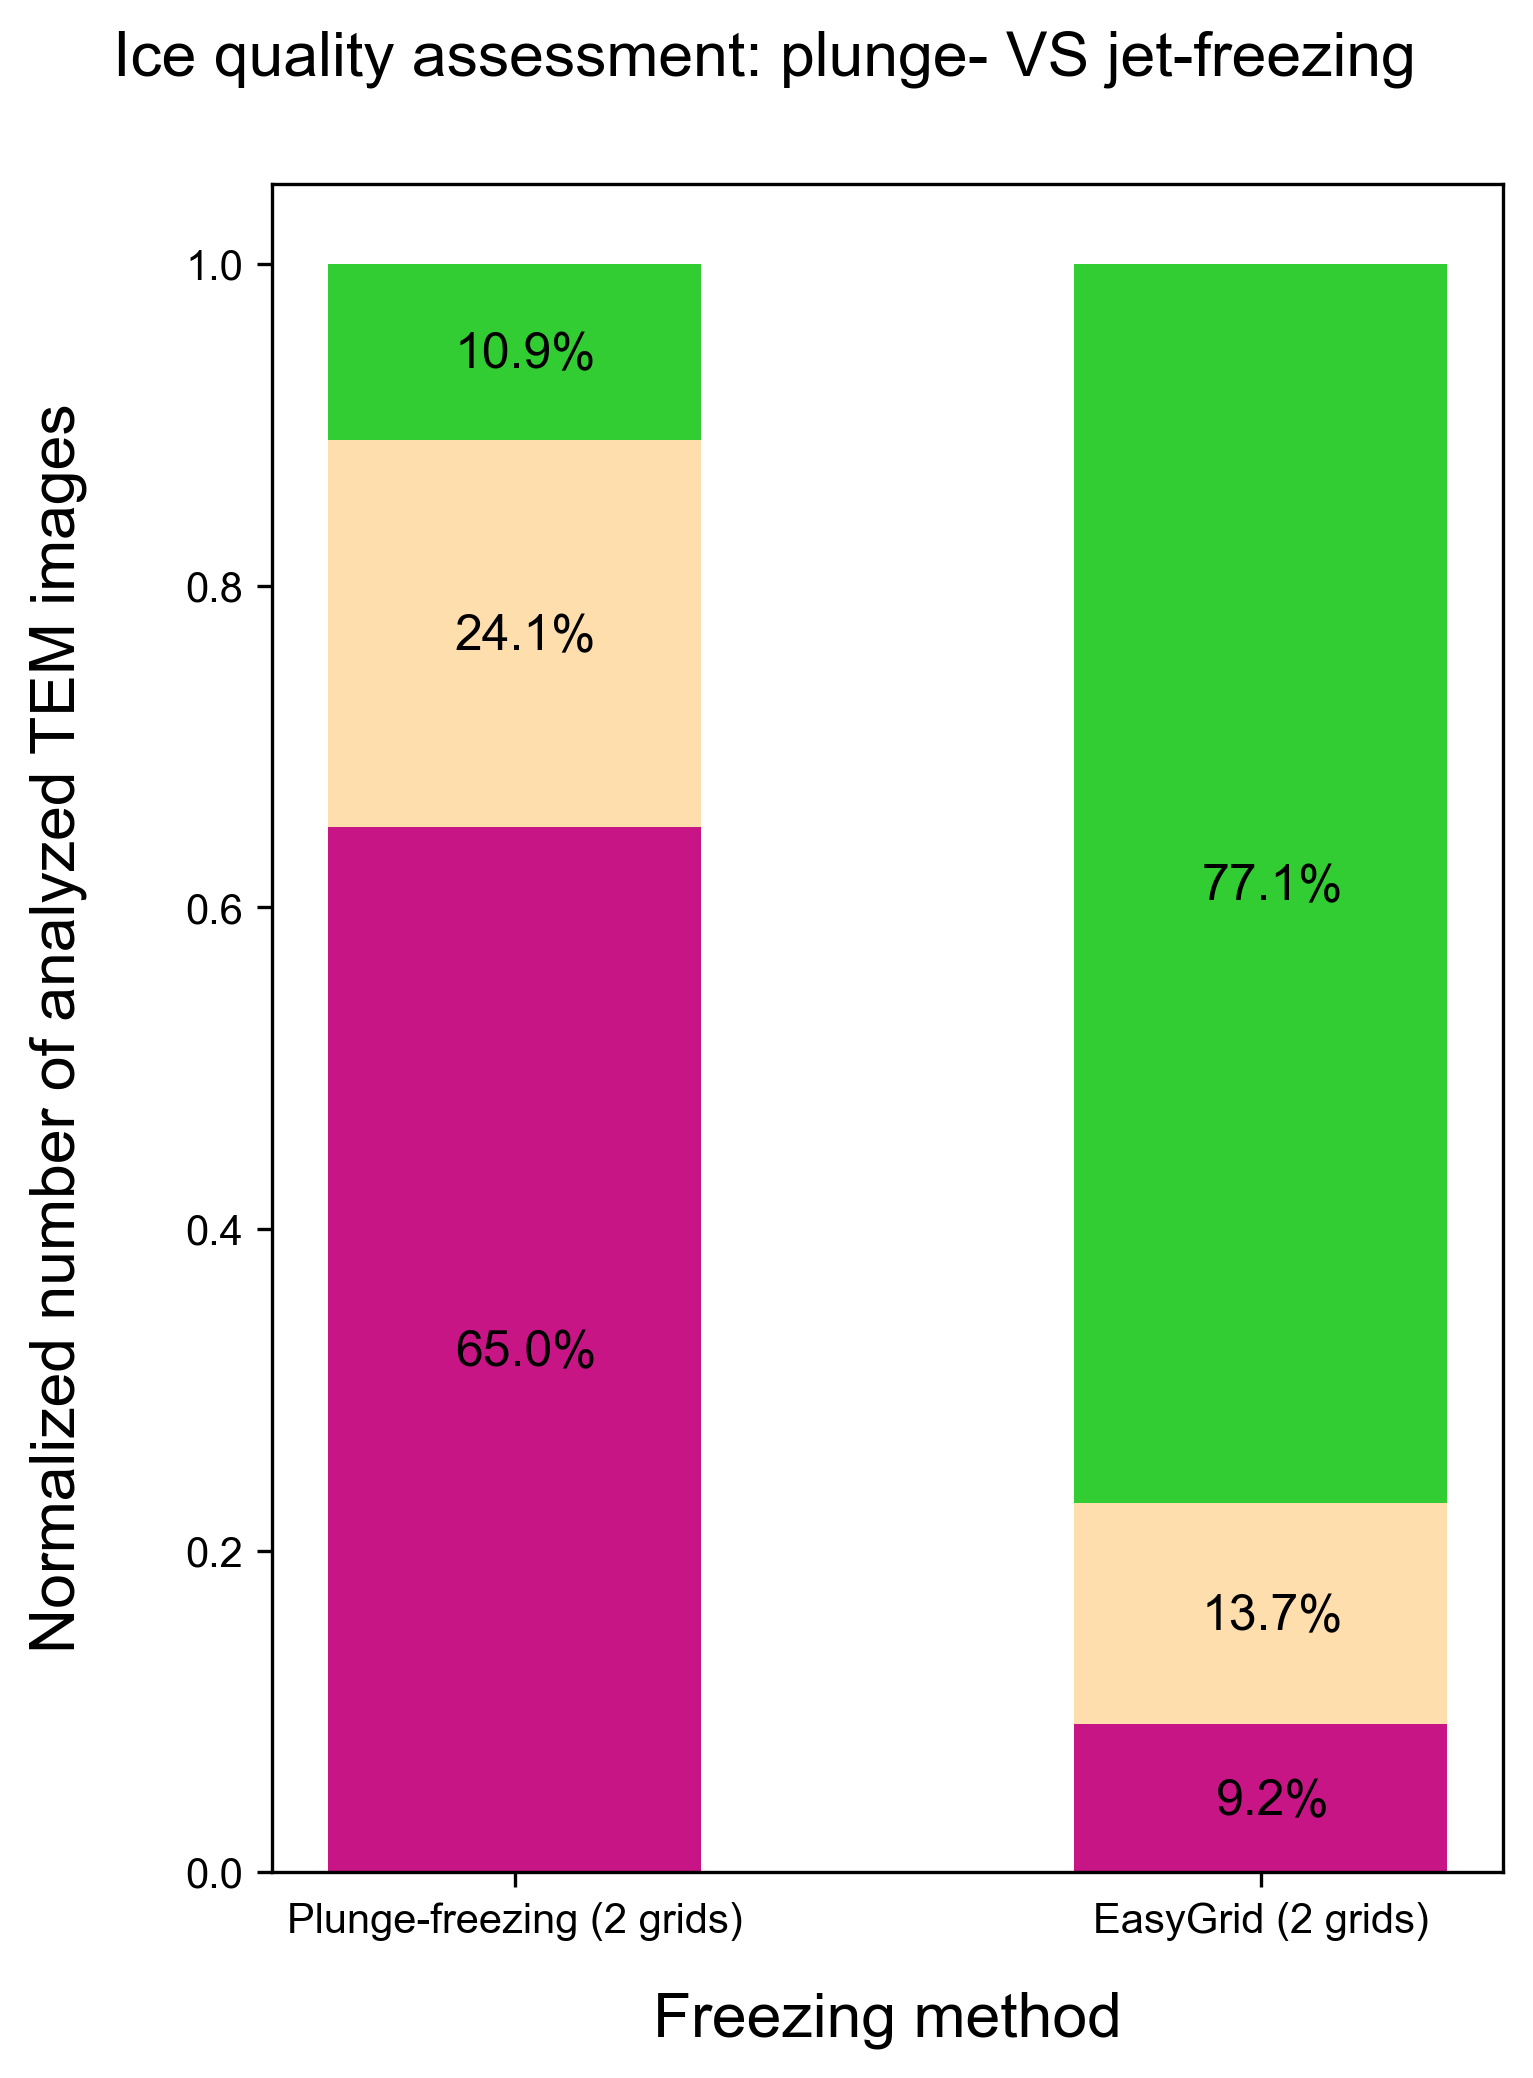

In [7]:
## Plot comparison GP2 // EG2 ##     normalized to number of positions

# Font2Arial
import matplotlib.font_manager as font_manager
font_path = '/g/mattei/0livier/_Utilities/arial-cufonfonts/ARIAL.TTF'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.sans-serif'] = prop.get_name()

# Data [GP2, EG2] : n,n=1,1
#Gcount=np.array([188, 1126])
#Dcount=np.array([375, 312])
#Ccount=np.array([1347, 215])
#Nimages=np.array([1910, 1653])

# Data [GP2, EG2] : n,n=1,2

Nimages=np.array([1910+1722, 1653+683])

Gcount=np.array([(188+209)/Nimages[0], (1126+674)/Nimages[1]])
Dcount=np.array([(375+499)/Nimages[0], (312+9)/Nimages[1]])
Ccount=np.array([(1347+1014)/Nimages[0], (215+0)/Nimages[1]])

# Figure formatting
FGSZ=(5.2,7) ; DPI=300
TTLFSZ=15 ; TTLyPOS=1.05
LBLFSZ=12
BarWidth=.5
Opath='figures/CompPFJF_n22-NORM.png'

#Bar plot
freezing_method = (
    "Plunge-freezing (2 grids)",
    "EasyGrid (2 grids)"
)
iceQ_counts = {
    "Crystalline": (Ccount,'mediumvioletred'),
    "Thick/semi-crystalline": (Dcount,'navajowhite'),
    "Vitreous": (Gcount,'limegreen'),
}

fig, ax = plt.subplots(figsize=FGSZ, dpi=DPI)
plt.title("Ice quality assessment: plunge- VS jet-freezing",fontsize=TTLFSZ,y=TTLyPOS)
plt.xlabel('Freezing method',fontsize=TTLFSZ)
plt.ylabel('Normalized number of analyzed TEM images',fontsize=TTLFSZ) #(pixel size 1.189Å)

bottom = np.zeros(2)
for boolean, iceQ_count in iceQ_counts.items():
    p = ax.bar(freezing_method, iceQ_count[0], BarWidth, label=boolean, bottom=bottom, color=iceQ_count[1])
    bottom += iceQ_count[0]

# # Invert legend order to fit stack order
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=12)
# ax.tick_params(labelsize=12)

# Print percentages at box centers
X=np.array([-0.08, 0.92])
Yoffset=0.01

Ypg=1-Gcount[0]/2              ;  Yjg=1-Gcount[1]/2
Ypd=Ccount[0]+Dcount[0]/2      ;  Yjd=Ccount[1]+Dcount[1]/2
Ypc=Ccount[0]/2                ;  Yjc=Ccount[1]/2

plt.text(X[0],Ypg-Yoffset,'%.1f%%'%(Gcount[0]*100),fontsize=LBLFSZ)
plt.text(X[0],Ypd-Yoffset,'%.1f%%'%(Dcount[0]*100),fontsize=LBLFSZ)
plt.text(X[0],Ypc-Yoffset,'%.1f%%'%(Ccount[0]*100),fontsize=LBLFSZ)
plt.text(X[1],Yjg-Yoffset,'%.1f%%'%(Gcount[1]*100),fontsize=LBLFSZ)
plt.text(X[1],Yjd-Yoffset,'%.1f%%'%(Dcount[1]*100),fontsize=LBLFSZ)
plt.text(X[1]+0.02,Yjc-Yoffset,'%.1f%%'%(Ccount[1]*100),fontsize=LBLFSZ)

ax.title.set_x(.4)
ax.xaxis.set_label_coords(.5, -.07)
ax.yaxis.set_label_coords(-.15, .5)

fig.tight_layout()
plt.savefig(Opath)
plt.show()

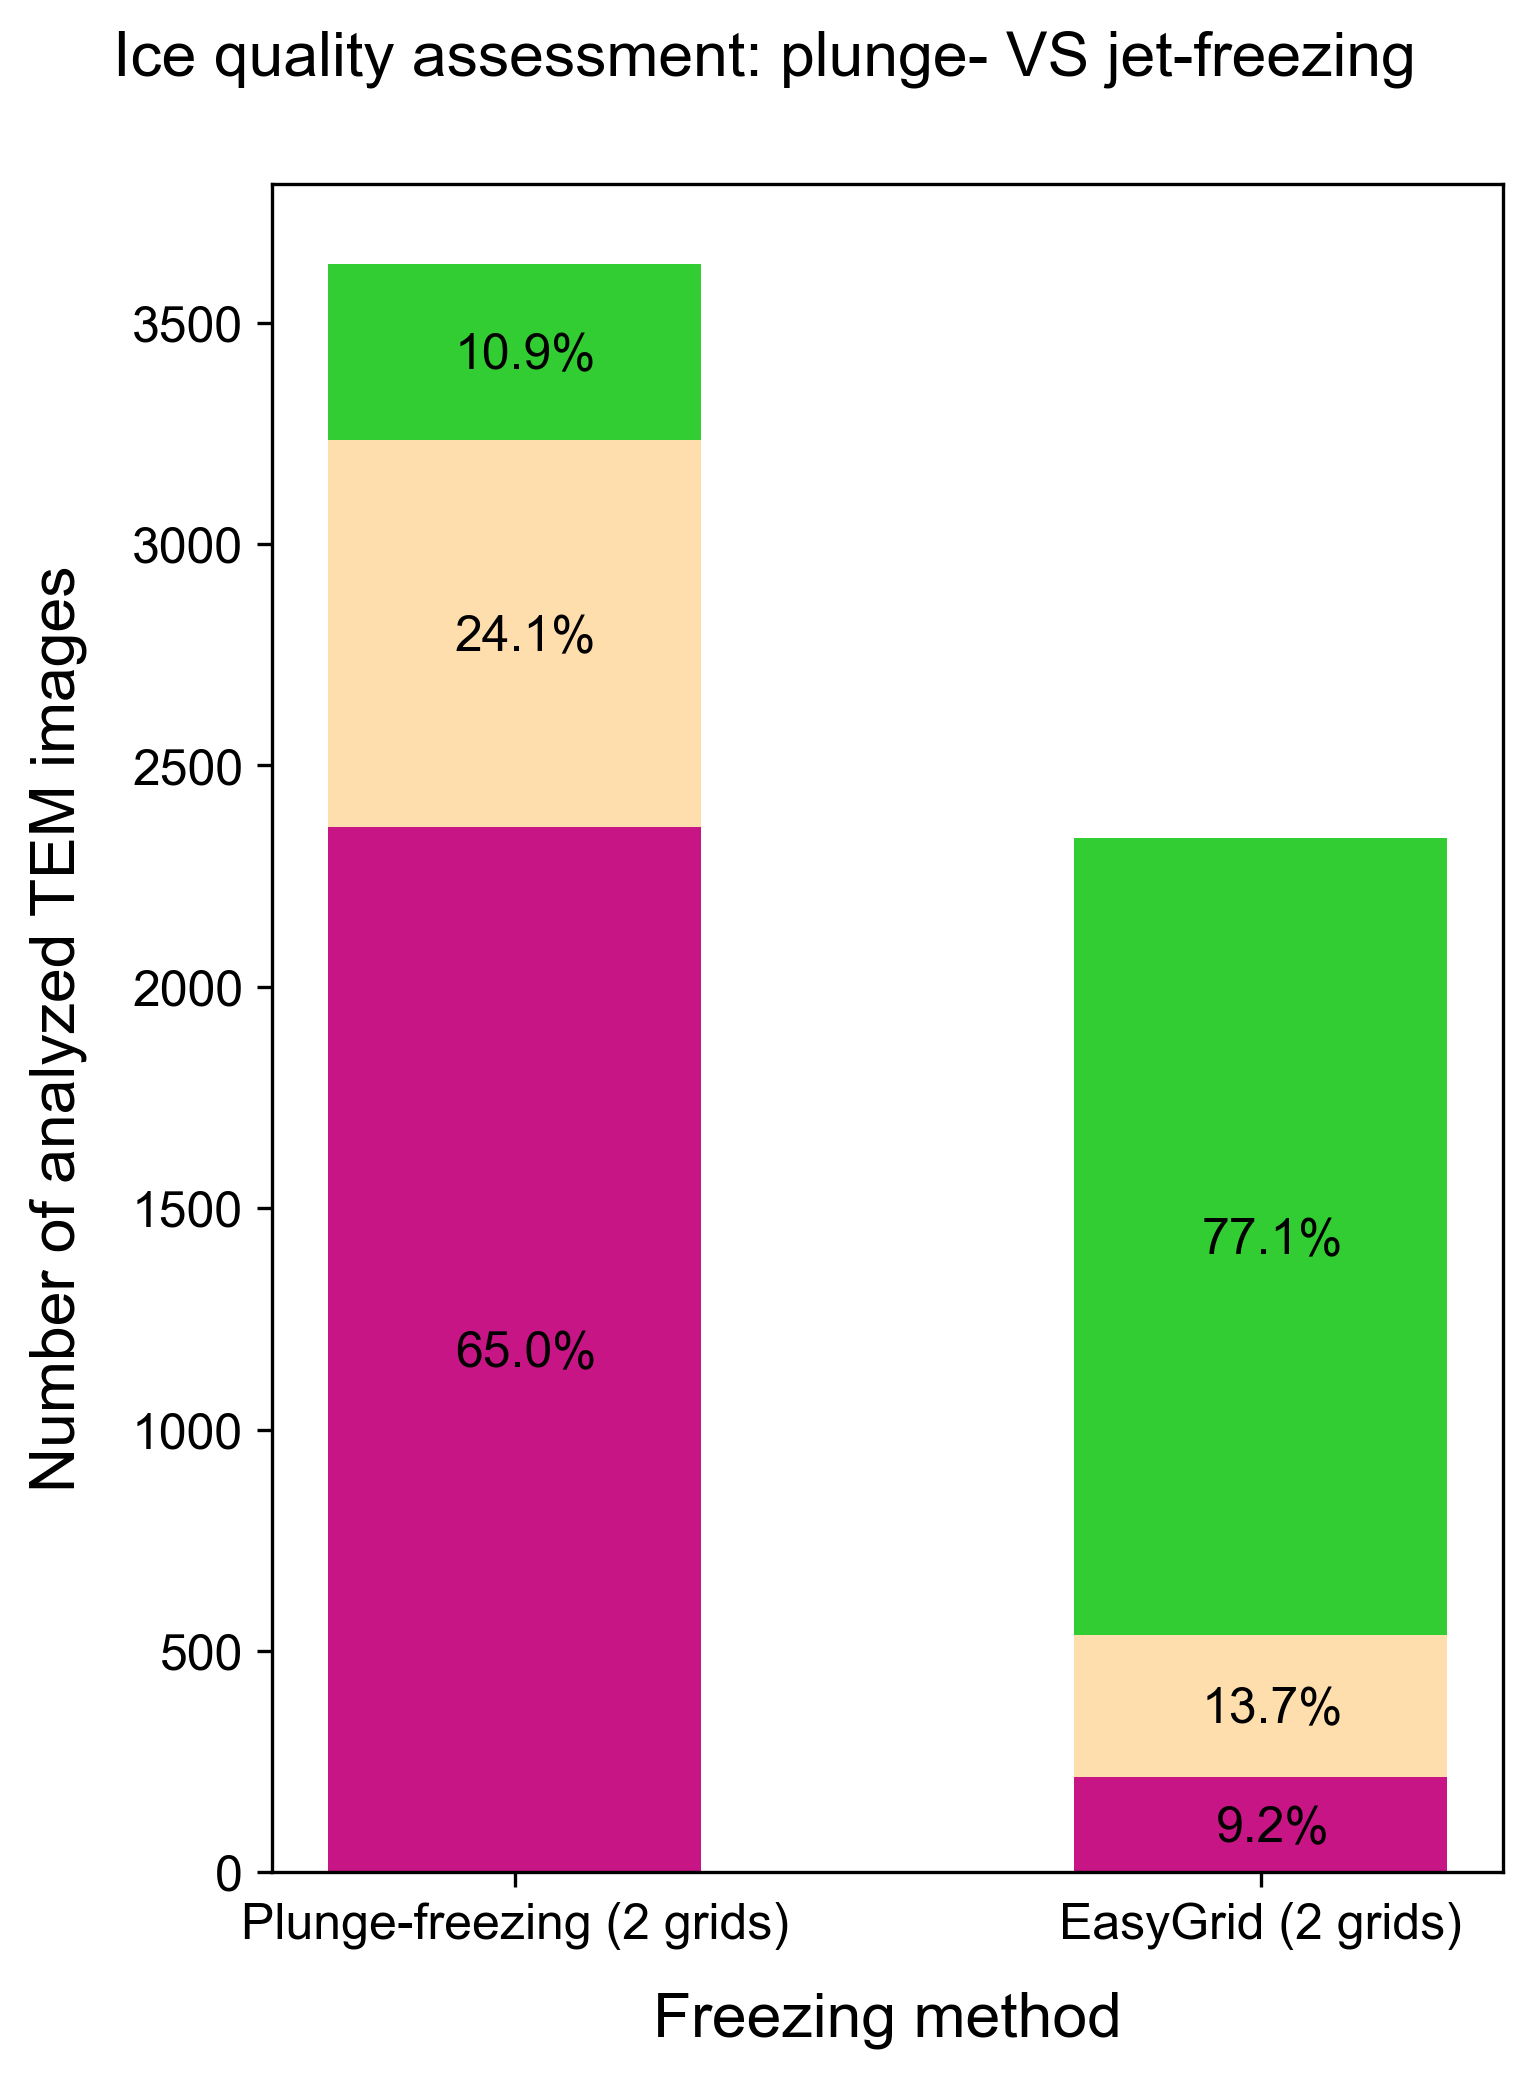

In [13]:
## Plot comparison GP2 // EG2 ##     absolute numbers

# Font2Arial
import matplotlib.font_manager as font_manager
font_path = '/g/mattei/0livier/_Utilities/arial-cufonfonts/ARIAL.TTF'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.sans-serif'] = prop.get_name()

# Data [GP2, EG2] : n,n=1,1
#Gcount=np.array([188, 1126])
#Dcount=np.array([375, 312])
#Ccount=np.array([1347, 215])
#Nimages=np.array([1910, 1653])

# Data [GP2, EG2] : n,n=1,2
Gcount=np.array([188+209, 1126+674])
Dcount=np.array([375+499, 312+9])
Ccount=np.array([1347+1014, 215+0])
Nimages=np.array([1910+1722, 1653+683])

# Figure formatting
FGSZ=(5.2,7) ; DPI=300
TTLFSZ=15 ; TTLyPOS=1.05
LBLFSZ=12
BarWidth=.5
Opath='figures/CompPFJF_n22.png'

#Bar plot
freezing_method = (
    "Plunge-freezing (2 grids)",
    "EasyGrid (2 grids)"
)
iceQ_counts = {
    "Crystalline": (Ccount,'mediumvioletred'),
    "Thick/semi-crystalline": (Dcount,'navajowhite'),
    "Vitreous": (Gcount,'limegreen'),
}

fig, ax = plt.subplots(figsize=FGSZ, dpi=DPI)
plt.title("Ice quality assessment: plunge- VS jet-freezing",fontsize=TTLFSZ,y=TTLyPOS)
plt.xlabel('Freezing method',fontsize=TTLFSZ)
plt.ylabel('Number of analyzed TEM images',fontsize=TTLFSZ) #(pixel size 1.189Å)

bottom = np.zeros(2)
for boolean, iceQ_count in iceQ_counts.items():
    p = ax.bar(freezing_method, iceQ_count[0], BarWidth, label=boolean, bottom=bottom, color=iceQ_count[1])
    bottom += iceQ_count[0]

# Invert legend order to fit stack order
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=12)
ax.tick_params(labelsize=12)

# Print percentages at box centers
X=np.array([-0.08, 0.92])
Yoffset=38

Ypg=Nimages[0]-Gcount[0]/2       ;  Yjg=Nimages[1]-Gcount[1]/2
Ypd=Ccount[0]+Dcount[0]/2        ;  Yjd=Ccount[1]+Dcount[1]/2
Ypc=Ccount[0]/2                  ;  Yjc=Ccount[1]/2

plt.text(X[0],Ypg-Yoffset,'%.1f%%'%(Gcount[0]/Nimages[0]*100),fontsize=LBLFSZ)
plt.text(X[0],Ypd-Yoffset,'%.1f%%'%(Dcount[0]/Nimages[0]*100),fontsize=LBLFSZ)
plt.text(X[0],Ypc-Yoffset,'%.1f%%'%(Ccount[0]/Nimages[0]*100),fontsize=LBLFSZ)
plt.text(X[1],Yjg-Yoffset,'%.1f%%'%(Gcount[1]/Nimages[1]*100),fontsize=LBLFSZ)
plt.text(X[1],Yjd-Yoffset,'%.1f%%'%(Dcount[1]/Nimages[1]*100),fontsize=LBLFSZ)
plt.text(X[1]+.02,Yjc-Yoffset,'%.1f%%'%(Ccount[1]/Nimages[1]*100),fontsize=LBLFSZ)

ax.title.set_x(.4)
ax.xaxis.set_label_coords(.5, -.07)
ax.yaxis.set_label_coords(-.15, .5)

fig.tight_layout()
plt.savefig(Opath)
plt.show()